# Load Data and Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import utilities
from utilities.woe import woe_conversion, woe_graph, woe_analysis, mono_bin, char_bin
from utilities.scorecard import scorecard
from utilities.adverse_action import adverse_action

In [3]:
df = pd.read_csv('dfClustered.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk
0,67,1,2,1,0,0,1169,6,5,Good
1,22,0,2,1,0,1,5951,48,5,Bad
2,49,1,1,1,0,0,2096,12,3,Good
3,45,1,2,0,0,0,7882,42,4,Bad
4,53,1,2,0,0,0,4870,24,1,Good
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,Good
996,40,1,3,1,0,0,3857,30,1,Good
997,38,1,2,1,0,0,804,12,5,Good
998,23,1,2,0,0,0,1845,45,5,Good


In [4]:
df['Credit_Risk'] = df['Credit_Risk'].map({'Bad':1, 'Good':0})

In [5]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk
0,67,1,2,1,0,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,0,2096,12,3,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,0
996,40,1,3,1,0,0,3857,30,1,0
997,38,1,2,1,0,0,804,12,5,0
998,23,1,2,0,0,0,1845,45,5,0


# Weigh of Evidence (WoE) Analysis

In [6]:
X = df.drop(['Credit_Risk'],axis=1)
y = df['Credit_Risk']

                MIN_VALUE  MAX_VALUE
Bucket                              
(18.999, 28.0]         19         28
(28.0, 38.0]           29         38
(38.0, 75.0]           39         75


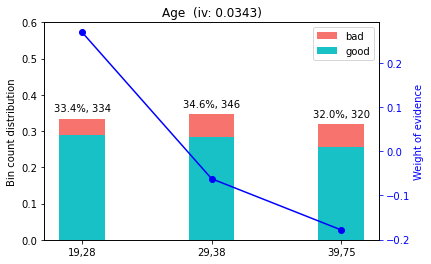

   COUNT
X       
0    310
1    690


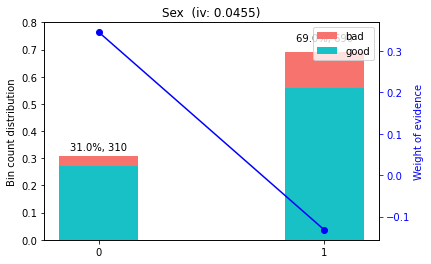

               MIN_VALUE  MAX_VALUE
Bucket                             
(-0.001, 2.0]          0          2
(2.0, 3.0]             3          3


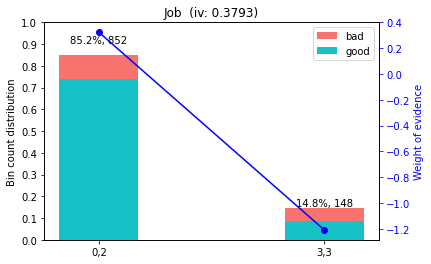

               MIN_VALUE  MAX_VALUE
Bucket                             
(-0.001, 1.0]          0          1
(1.0, 2.0]             2          2


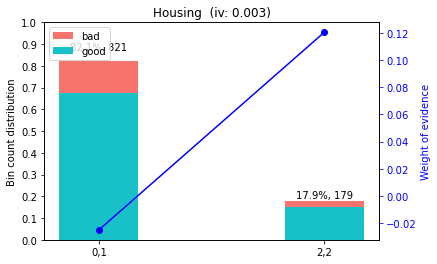

               MIN_VALUE  MAX_VALUE
Bucket                             
(-0.001, 1.0]          0          1
(1.0, 3.0]             2          3


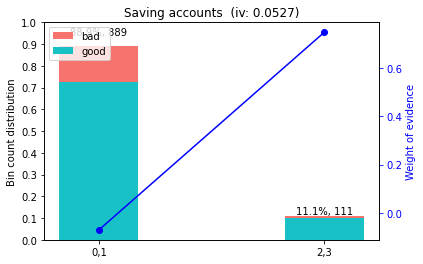

               MIN_VALUE  MAX_VALUE
Bucket                             
(-0.001, 1.0]          0          1
(1.0, 2.0]             2          2


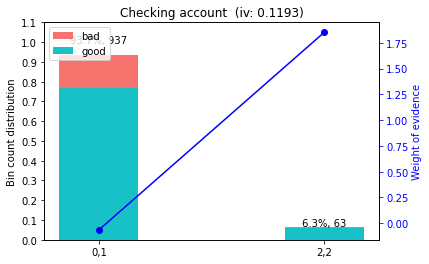

                   MIN_VALUE  MAX_VALUE
Bucket                                 
(249.999, 2319.5]        250       2319
(2319.5, 18424.0]       2320      18424


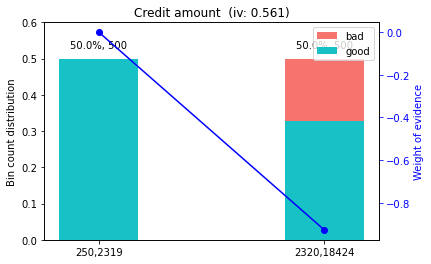

                MIN_VALUE  MAX_VALUE
Bucket                              
(3.999, 9.714]          4          9
(9.714, 12.0]          10         12
(12.0, 15.0]           13         15
(15.0, 21.0]           16         21
(21.0, 24.0]           22         24
(24.0, 36.0]           26         36
(36.0, 72.0]           39         72


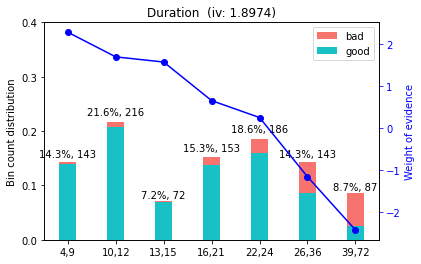

               MIN_VALUE  MAX_VALUE
Bucket                             
(-0.001, 1.0]          0          1
(1.0, 4.0]             2          4
(4.0, 7.0]             5          7


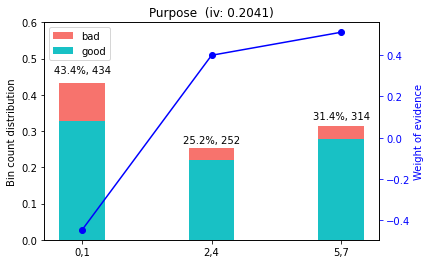

In [7]:
final_iv, IV = woe_analysis(X, y, 20, 3)

In [8]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,min_range,max_range,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,bucket,WOE,IV
0,Age,19,28,0.0,28.0,334,46,0.137725,288,0.862275,0.265896,0.348247,"(-inf, 28.0]",0.269806,0.034347
1,Age,29,38,28.0,38.0,346,63,0.182081,283,0.817919,0.364162,0.342201,"(28.0, 38.0]",-0.062201,0.034347
2,Age,39,75,38.0,0.0,320,64,0.200000,256,0.800000,0.369942,0.309553,"(38.0, inf]",-0.178219,0.034347
3,Sex,0,0,0.0,0.0,310,40,0.129032,270,0.870968,0.231214,0.326481,0,0.345029,0.045474
4,Sex,1,1,1.0,1.0,690,133,0.192754,557,0.807246,0.768786,0.673519,1,-0.132297,0.045474
5,Job,0,2,0.0,2.0,852,112,0.131455,740,0.868545,0.647399,0.894800,"(-inf, 2.0]",0.323638,0.379296
6,Job,3,3,2.0,0.0,148,61,0.412162,87,0.587838,0.352601,0.105200,"(2.0, inf]",-1.209479,0.379296
7,Housing,0,1,0.0,1.0,821,145,0.176614,676,0.823386,0.838150,0.817412,"(-inf, 1.0]",-0.025054,0.003020
8,Housing,2,2,1.0,0.0,179,28,0.156425,151,0.843575,0.161850,0.182588,"(1.0, inf]",0.120562,0.003020
9,Saving accounts,0,1,0.0,1.0,889,163,0.183352,726,0.816648,0.942197,0.877872,"(-inf, 1.0]",-0.070713,0.052665


In [9]:
IV

,VAR_NAME,IV
0,Age,0.034347
1,Checking account,0.119312
2,Credit amount,0.560970
3,Duration,1.897450
4,Housing,0.003020
5,Job,0.379296
6,Purpose,0.204053
7,Saving accounts,0.052665
8,Sex,0.045474


# Convert Training Data to WoE Values

In [10]:
X_woe = woe_conversion(X, final_iv)

In [11]:
X_woe

,Age_woe,Sex_woe,Job_woe,Housing_woe,Saving accounts_woe,Checking account_woe,Credit amount_woe,Duration_woe,Purpose_woe
0,-0.178219,-0.132297,0.323638,-0.025054,-0.070713,-0.064994,0.000000,2.278517,0.511351
1,0.269806,0.345029,0.323638,-0.025054,-0.070713,-0.064994,-0.927845,-2.417290,0.511351
2,-0.178219,-0.132297,0.323638,-0.025054,-0.070713,-0.064994,0.000000,1.693583,0.399662
3,-0.178219,-0.132297,0.323638,-0.025054,-0.070713,-0.064994,-0.927845,-2.417290,0.399662
4,-0.178219,-0.132297,0.323638,-0.025054,-0.070713,-0.064994,-0.927845,0.252564,-0.447382
...,...,...,...,...,...,...,...,...,...
995,-0.062201,0.345029,0.323638,-0.025054,-0.070713,-0.064994,0.000000,1.693583,0.399662
996,-0.178219,-0.132297,-1.209479,-0.025054,-0.070713,-0.064994,-0.927845,-1.153217,-0.447382
997,-0.062201,-0.132297,0.323638,-0.025054,-0.070713,-0.064994,0.000000,1.693583,0.511351
998,0.269806,-0.132297,0.323638,-0.025054,-0.070713,-0.064994,0.000000,-2.417290,0.511351


# Perform Classification Model to Predict Credit Score

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                       'penalty': ['l1', 'l2']}
 
clf_logistic = GridSearchCV(estimator=LogisticRegression(random_state=1), param_grid=param_grid_logistic, cv= kfold)
clf_logistic.fit(X_woe, y)
 
logistic_final = clf_logistic.best_estimator_
print(clf_logistic.best_score_, clf_logistic.best_params_)
print(logistic_final)

0.874 {'C': 1000, 'penalty': 'l2'}
LogisticRegression(C=1000, random_state=1)


C:\Users\Ghaza\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ghaza\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ghaza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ghaza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

## XGBoost

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range 

kfold = StratifiedKFold(n_splits=10)

parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
   
best_xgb = RandomizedSearchCV(XGBClassifier(), parameters, refit = True, verbose = 3,n_jobs=-1, cv=kfold) 
   
# fitting the model for randomized search CV 
best_xgb.fit(X_woe, y) 
 
# print best parameter after tuning 
print(best_xgb.best_params_)

#print best score
print(best_xgb.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Ghaza\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.3}
0.8700000000000001


## RandomForest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

randomforest = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=10)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf_randomforest = RandomizedSearchCV(randomforest, param_grid,refit=True, cv= kfold)


clf_randomforest.fit(X_woe, y) 
print('Best parameters found:\n', clf_randomforest.best_params_)
print(clf_randomforest.best_score_)

Best parameters found:
 {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
0.8720000000000001


## Fit LogisticRegression with Best Parameter

In [15]:
logreg_clf = LogisticRegression(penalty = 'l2', C=1000)
logreg_clf.fit(X_woe, y)

LogisticRegression(C=1000)

# Generate Credit Score for All Data, and Generate Score table

In [16]:
X_score_tab, X_scored = scorecard(X_woe, logreg_clf, final_iv, 600, 50, 20)

In [17]:
X_scored

,Age_score,Sex_score,Job_score,Housing_score,Saving accounts_score,Checking account_score,Credit amount_score,Duration_score,Purpose_score,neutral,Total_Credit_Score
0,80.859194,85.276695,92.997797,87.212534,84.505551,84.648442,86.065988,133.341563,96.574470,86.065988,831.482233
1,93.948571,88.124456,92.997797,87.212534,84.505551,84.648442,-173.522643,35.911087,96.574470,86.065988,490.400265
2,80.859194,85.276695,92.997797,87.212534,84.505551,84.648442,86.065988,121.205128,94.279227,86.065988,817.050556
3,80.859194,85.276695,92.997797,87.212534,84.505551,84.648442,-173.522643,35.911087,94.279227,86.065988,472.167884
4,80.859194,85.276695,92.997797,87.212534,84.505551,84.648442,-173.522643,91.306289,76.872094,86.065988,510.155953
...,...,...,...,...,...,...,...,...,...,...,...
995,84.248741,88.124456,92.997797,87.212534,84.505551,84.648442,86.065988,121.205128,94.279227,86.065988,823.287864
996,80.859194,85.276695,60.160896,87.212534,84.505551,84.648442,-173.522643,62.138582,76.872094,86.065988,448.151345
997,84.248741,85.276695,92.997797,87.212534,84.505551,84.648442,86.065988,121.205128,96.574470,86.065988,822.735346
998,93.948571,85.276695,92.997797,87.212534,84.505551,84.648442,86.065988,35.911087,96.574470,86.065988,747.141134


In [18]:
X_score_tab

,variable,bucket,WOE,score
0,Age,"(-inf, 28.0]",0.269806,93.948571
1,Age,"(28.0, 38.0]",-0.062201,84.248741
2,Age,"(38.0, inf]",-0.178219,80.859194
3,Sex,0,0.345029,88.124456
4,Sex,1,-0.132297,85.276695
5,Job,"(-inf, 2.0]",0.323638,92.997797
6,Job,"(2.0, inf]",-1.209479,60.160896
7,Housing,"(-inf, 1.0]",-0.025054,87.212534
8,Housing,"(1.0, inf]",0.120562,80.548645
9,Saving accounts,"(-inf, 1.0]",-0.070713,84.505551


In [19]:
score = X_scored[['Total_Credit_Score']]

In [20]:
df_full = pd.concat([df, score], axis=1)
df_full

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score
0,67,1,2,1,0,0,1169,6,5,0,831.482233
1,22,0,2,1,0,1,5951,48,5,1,490.400265
2,49,1,1,1,0,0,2096,12,3,0,817.050556
3,45,1,2,0,0,0,7882,42,4,1,472.167884
4,53,1,2,0,0,0,4870,24,1,0,510.155953
...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,0,823.287864
996,40,1,3,1,0,0,3857,30,1,0,448.151345
997,38,1,2,1,0,0,804,12,5,0,822.735346
998,23,1,2,0,0,0,1845,45,5,0,747.141134


In [21]:
df_full.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,0.690000,1.904000,1.071000,0.373000,0.395000,3271.258000,20.903000,2.878000,0.173000,662.264253
std,11.375469,0.462725,0.653614,0.531264,0.805307,0.604434,2822.736876,12.058814,1.978138,0.378437,154.208161
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000,418.649507
25%,27.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1365.500000,12.000000,1.000000,0.000000,513.410054
50%,33.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2319.500000,18.000000,3.000000,0.000000,661.363536
75%,42.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3972.250000,24.000000,5.000000,0.000000,815.272193
max,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000,1.000000,889.255963


In [22]:
df_full.quantile([.1, .2])

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score
0.1,23.0,0.0,1.0,0.0,0.0,0.0,932.0,9.0,1.0,0.0,478.943921
0.2,26.0,0.0,1.0,1.0,0.0,0.0,1262.0,12.0,1.0,0.0,501.784927


In [23]:
df_full['hard_reject'] = np.where(df_full['Total_Credit_Score']>=478, 0, 1)
df_full['pct20'] = np.where(df_full['Total_Credit_Score']>=501, 0, 1)
df_full

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,hard_reject,pct20
0,67,1,2,1,0,0,1169,6,5,0,831.482233,0,0
1,22,0,2,1,0,1,5951,48,5,1,490.400265,0,1
2,49,1,1,1,0,0,2096,12,3,0,817.050556,0,0
3,45,1,2,0,0,0,7882,42,4,1,472.167884,1,1
4,53,1,2,0,0,0,4870,24,1,0,510.155953,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,0,823.287864,0,0
996,40,1,3,1,0,0,3857,30,1,0,448.151345,1,1
997,38,1,2,1,0,0,804,12,5,0,822.735346,0,0
998,23,1,2,0,0,0,1845,45,5,0,747.141134,0,0


In [24]:
np.random.seed(1234)
df_full['randNum'] = np.random.uniform(0, 1, df_full.shape[0])
df_full['override'] = np.where((df_full['pct20']==1) & (df_full['randNum'] < 0.15), 1, 0)
df_full

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,hard_reject,pct20,randNum,override
0,67,1,2,1,0,0,1169,6,5,0,831.482233,0,0,0.191519,0
1,22,0,2,1,0,1,5951,48,5,1,490.400265,0,1,0.622109,0
2,49,1,1,1,0,0,2096,12,3,0,817.050556,0,0,0.437728,0
3,45,1,2,0,0,0,7882,42,4,1,472.167884,1,1,0.785359,0
4,53,1,2,0,0,0,4870,24,1,0,510.155953,0,0,0.779976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,0,823.287864,0,0,0.995838,0
996,40,1,3,1,0,0,3857,30,1,0,448.151345,1,1,0.944205,0
997,38,1,2,1,0,0,804,12,5,0,822.735346,0,0,0.131144,0
998,23,1,2,0,0,0,1845,45,5,0,747.141134,0,0,0.518355,0


In [25]:
df_full['reject'] = np.where((((df_full['hard_reject'] == 1) & (df_full['override'] == 0)) |
                            ((df_full['hard_reject'] == 0) & (df_full['override'] == 1))),1,0)
df_full

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,hard_reject,pct20,randNum,override,reject
0,67,1,2,1,0,0,1169,6,5,0,831.482233,0,0,0.191519,0,0
1,22,0,2,1,0,1,5951,48,5,1,490.400265,0,1,0.622109,0,0
2,49,1,1,1,0,0,2096,12,3,0,817.050556,0,0,0.437728,0,0
3,45,1,2,0,0,0,7882,42,4,1,472.167884,1,1,0.785359,0,1
4,53,1,2,0,0,0,4870,24,1,0,510.155953,0,0,0.779976,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,0,823.287864,0,0,0.995838,0,0
996,40,1,3,1,0,0,3857,30,1,0,448.151345,1,1,0.944205,0,1
997,38,1,2,1,0,0,804,12,5,0,822.735346,0,0,0.131144,0,0
998,23,1,2,0,0,0,1845,45,5,0,747.141134,0,0,0.518355,0,0


# Count Rejected and Accepted Customer

In [26]:
df_full['Total_Credit_Score'].groupby(df_full['reject']).describe()

,count,mean,std,min,25%,50%,75%,max
reject,,,,,,,,
0,896.0,685.327381,146.226654,421.923850,531.588804,775.981892,819.345799,889.255963
1,104.0,463.566536,18.872617,418.649507,451.540892,465.942063,477.208851,500.690622


In [27]:
df_full

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,hard_reject,pct20,randNum,override,reject
0,67,1,2,1,0,0,1169,6,5,0,831.482233,0,0,0.191519,0,0
1,22,0,2,1,0,1,5951,48,5,1,490.400265,0,1,0.622109,0,0
2,49,1,1,1,0,0,2096,12,3,0,817.050556,0,0,0.437728,0,0
3,45,1,2,0,0,0,7882,42,4,1,472.167884,1,1,0.785359,0,1
4,53,1,2,0,0,0,4870,24,1,0,510.155953,0,0,0.779976,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,0,823.287864,0,0,0.995838,0,0
996,40,1,3,1,0,0,3857,30,1,0,448.151345,1,1,0.944205,0,1
997,38,1,2,1,0,0,804,12,5,0,822.735346,0,0,0.131144,0,0
998,23,1,2,0,0,0,1845,45,5,0,747.141134,0,0,0.518355,0,0


In [28]:
df_full['Credit_Risk'] = df_full['Credit_Risk'].map({1:'Bad', 0:'Good'})
df_full['reject'] = df_full['reject'].map({1:'Rejected', 0:'Accepted'})
df_full['Sex'] = df_full['Sex'].map({0:'female', 1:'male'})
df_full['Housing'] = df_full['Housing'].map({0:'free', 1:'own', 2:'rent'})
df_full['Saving accounts'] = df_full['Saving accounts'].map({0:'little', 1:'moderate', 2:'quite rich', 3:'rich'})
df_full['Checking account'] = df_full['Checking account'].map({0:'little', 1:'moderate', 2:'rich'})
df_full['Purpose'] = df_full['Purpose'].map({0:'business', 1:'car', 2:'domestic appliances', 3:'education', 4:'furniture/equipment', 5:'radio/TV', 6:'repairs', 7:'vacation/others'})
df_full['Job'] = df_full['Job'].map({0:'Unskilled-Non Resident', 1:'Unskilled-Resident', 2:'Skilled', 3:'Highly Skilled'})

In [29]:
df_full

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,hard_reject,pct20,randNum,override,reject
0,67,male,Skilled,own,little,little,1169,6,radio/TV,Good,831.482233,0,0,0.191519,0,Accepted
1,22,female,Skilled,own,little,moderate,5951,48,radio/TV,Bad,490.400265,0,1,0.622109,0,Accepted
2,49,male,Unskilled-Resident,own,little,little,2096,12,education,Good,817.050556,0,0,0.437728,0,Accepted
3,45,male,Skilled,free,little,little,7882,42,furniture/equipment,Bad,472.167884,1,1,0.785359,0,Rejected
4,53,male,Skilled,free,little,little,4870,24,car,Good,510.155953,0,0,0.779976,0,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,Unskilled-Resident,own,little,little,1736,12,furniture/equipment,Good,823.287864,0,0,0.995838,0,Accepted
996,40,male,Highly Skilled,own,little,little,3857,30,car,Good,448.151345,1,1,0.944205,0,Rejected
997,38,male,Skilled,own,little,little,804,12,radio/TV,Good,822.735346,0,0,0.131144,0,Accepted
998,23,male,Skilled,free,little,little,1845,45,radio/TV,Good,747.141134,0,0,0.518355,0,Accepted


In [30]:
df_full['Credit_Risk'].value_counts()

Good    827
Bad     173
Name: Credit_Risk, dtype: int64

In [31]:
df_full['reject'].value_counts()

Accepted    896
Rejected    104
Name: reject, dtype: int64

In [32]:
reject = df_full[df_full.reject == 'Rejected']
reject = reject.drop(['hard_reject', 'pct20', 'randNum', 'override'], axis=1)
reject = reject.reset_index(drop=True)
reject

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,reject
0,45,male,Skilled,free,little,little,7882,42,furniture/equipment,Bad,472.167884,Rejected
1,35,male,Highly Skilled,rent,little,moderate,6948,36,car,Bad,444.877003,Rejected
2,28,male,Highly Skilled,own,little,moderate,5234,30,car,Good,461.240722,Rejected
3,24,female,Skilled,rent,little,little,4308,48,business,Good,464.033999,Rejected
4,25,male,Skilled,own,little,little,8072,30,business,Bad,494.077623,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
99,33,male,Highly Skilled,rent,little,little,4844,48,business,Good,418.649507,Rejected
100,29,male,Highly Skilled,free,little,little,6579,24,car,Bad,480.708599,Rejected
101,30,male,Highly Skilled,own,little,little,3959,36,furniture/equipment,Good,468.948026,Rejected
102,40,male,Highly Skilled,own,little,little,3857,30,car,Good,448.151345,Rejected


In [33]:
reject['Credit_Risk'].value_counts()

Bad     71
Good    33
Name: Credit_Risk, dtype: int64

In [34]:
accept = df_full[df_full.reject == 'Accepted']
accept = accept.drop(['hard_reject', 'pct20', 'randNum', 'override'], axis=1)
accept = accept.reset_index(drop=True)
accept

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,reject
0,67,male,Skilled,own,little,little,1169,6,radio/TV,Good,831.482233,Accepted
1,22,female,Skilled,own,little,moderate,5951,48,radio/TV,Bad,490.400265,Accepted
2,49,male,Unskilled-Resident,own,little,little,2096,12,education,Good,817.050556,Accepted
3,53,male,Skilled,free,little,little,4870,24,car,Good,510.155953,Accepted
4,35,male,Unskilled-Resident,free,little,little,9055,36,education,Bad,501.784927,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...
891,23,male,Unskilled-Resident,rent,little,little,1936,18,radio/TV,Good,804.215921,Accepted
892,50,male,Skilled,own,little,little,2390,12,car,Good,540.054792,Accepted
893,31,female,Unskilled-Resident,own,little,little,1736,12,furniture/equipment,Good,823.287864,Accepted
894,38,male,Skilled,own,little,little,804,12,radio/TV,Good,822.735346,Accepted


In [35]:
accept['Credit_Risk'].value_counts()

Good    794
Bad     102
Name: Credit_Risk, dtype: int64

# The Chosen Customer

The Chosen Customer is final decision which contain a group of customers who are identified as Good Credit Risk by Clustering Algorithm and are evaluated as Accepted customer by Credit Scorecard calculation

In [36]:
ChosenCustomer = accept[accept['Credit_Risk']=='Good']
ChosenCustomer = ChosenCustomer.reset_index(drop=True)
ChosenCustomer

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,reject
0,67,male,Skilled,own,little,little,1169,6,radio/TV,Good,831.482233,Accepted
1,49,male,Unskilled-Resident,own,little,little,2096,12,education,Good,817.050556,Accepted
2,53,male,Skilled,free,little,little,4870,24,car,Good,510.155953,Accepted
3,53,male,Skilled,own,quite rich,little,2835,24,furniture/equipment,Good,545.630199,Accepted
4,61,male,Unskilled-Resident,own,rich,little,3059,12,radio/TV,Good,577.824281,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...
789,23,male,Unskilled-Resident,rent,little,little,1936,18,radio/TV,Good,804.215921,Accepted
790,50,male,Skilled,own,little,little,2390,12,car,Good,540.054792,Accepted
791,31,female,Unskilled-Resident,own,little,little,1736,12,furniture/equipment,Good,823.287864,Accepted
792,38,male,Skilled,own,little,little,804,12,radio/TV,Good,822.735346,Accepted


In [37]:
ChosenCustomer.to_csv('ChosenCustomer.csv', index=False)

# The Worst Customer

The Worst Customer is final decision which contain a group of customers who are identified as Bad Credit Risk by Clustering Algorithm and are evaluated as Rejected Customer by Credit Scorecard calculation

In [38]:
WorstCustomer = reject[reject['Credit_Risk']=='Bad']
WorstCustomer = WorstCustomer.reset_index(drop=True)
WorstCustomer

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk,Total_Credit_Score,reject
0,45,male,Skilled,free,little,little,7882,42,furniture/equipment,Bad,472.167884,Rejected
1,35,male,Highly Skilled,rent,little,moderate,6948,36,car,Bad,444.877003,Rejected
2,25,male,Skilled,own,little,little,8072,30,business,Bad,494.077623,Rejected
3,63,male,Skilled,own,little,little,6836,60,business,Bad,454.760751,Rejected
4,31,male,Skilled,free,little,little,6110,48,education,Bad,475.557431,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
66,39,male,Skilled,free,little,little,10297,48,car,Bad,454.760751,Rejected
67,46,male,Highly Skilled,own,little,little,6842,24,car,Bad,477.319052,Rejected
68,29,male,Skilled,rent,little,little,7166,42,radio/TV,Bad,471.188784,Rejected
69,36,male,Skilled,rent,little,little,7297,60,business,Bad,451.486408,Rejected


In [39]:
WorstCustomer.to_csv('WorstCustomer.csv', index=False)